In [35]:
GEOMS = (
    geometry.Point(0, 0),
    geometry.MultiPoint([[0, 0], [1, 1]]),
    geometry.LineString([[0, 0], [1, 1]]),
    geometry.Polygon([[0, 0], [1, 1], [0, 1], [0, 0]]),
    geometry.MultiLineString([[[0, 0], [1, 1]], [[1, 0], [0, 1]]]),
    geometry.MultiPolygon([
        geometry.Polygon([[2, 2], [4, 7], [5, 5], [2, 2]]),
        geometry.Polygon([[0, 0], [1, 1], [0, 1], [0, 0]])
    ])
)

PROPERTIES = (
    {'id': 1, 'is_multi': False},
    {'id': 2, 'is_multi': True},
    {'id': 3, 'is_multi': False},
    {'id': 4, 'is_multi': False},
    {'id': 5, 'is_multi': True},
    {'id': 6, 'is_multi': True}
)

FEATURES = list(map(lambda args: Feature(geometry=args[0], properties=args[1]),
                    zip(GEOMS, PROPERTIES)))
FCOLLECTION = FeatureCollection(FEATURES)

In [66]:
from voluptuous import Schema, Range, Required, All, ALLOW_EXTRA

In [74]:
schema = Schema({
            Required('id'): All(int, Range(min=2, max=4))
        }, extra=ALLOW_EXTRA)

In [75]:
FCOLLECTION.features[0]

In [77]:
schema(FCOLLECTION.features[1].properties)

{'id': 2, 'is_multi': True}

In [45]:
FCOLLECTION

In [50]:
schema.infer(g.properties)

<Schema(<class 'NoneType'>, extra=PREVENT_EXTRA, required=False) object at 0x11faac1d0>

In [58]:
schema.infer(g.properties)

<Schema({'id': <class 'int'>, 'is_multi': <class 'bool'>}, extra=PREVENT_EXTRA, required=False) object at 0x1129d5f60>

In [56]:
for g in FCOLLECTION:
    print(g.json())

{"type": "Feature", "geometry": {"type": "Point", "coordinates": [0.0, 0.0]}, "properties": {"id": 1, "is_multi": false}}
{"type": "Feature", "geometry": {"type": "MultiPoint", "coordinates": [[0.0, 0.0], [1.0, 1.0]]}, "properties": {"id": 2, "is_multi": true}}
{"type": "Feature", "geometry": {"type": "LineString", "coordinates": [[0.0, 0.0], [1.0, 1.0]]}, "properties": {"id": 3, "is_multi": false}}
{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[0.0, 0.0], [1.0, 1.0], [0.0, 1.0], [0.0, 0.0]]]}, "properties": {"id": 4, "is_multi": false}}
{"type": "Feature", "geometry": {"type": "MultiLineString", "coordinates": [[[0.0, 0.0], [1.0, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]}, "properties": {"id": 5, "is_multi": true}}
{"type": "Feature", "geometry": {"type": "MultiPolygon", "coordinates": [[[[2.0, 2.0], [4.0, 7.0], [5.0, 5.0], [2.0, 2.0]]], [[[0.0, 0.0], [1.0, 1.0], [0.0, 1.0], [0.0, 0.0]]]]}, "properties": {"id": 6, "is_multi": true}}


In [23]:
geometry.mapping(g)

{'type': 'MultiPolygon', 'coordinates': []}

In [11]:
GEOMS[5]

IndexError: tuple index out of range

In [2]:
import rtree
import pathlib
import fiona
from toolz import take
from shapely import geometry
import pyproj
from cogj import Feature, FeatureCollection

from collections import OrderedDict

# Lets load up some data
resources = pathlib.Path('resources')
with fiona.open(resources / 'watercourse.geojson') as src:
    meta = src.meta
    features = [{
            'properties': s['properties'], 
            'type': s['type'],
            'geometry': geometry.asShape(s['geometry'])
        } for s in src
    ]

# Everything is a multipolygon, let seperate things out
feature = features[0]
features = []
properties = OrderedDict([
    ('object_id', 1),
    ('parcel_type', 'water'),
    ('shape_length', None),
    ('shape_area', None)
])
for polygon in feature['geometry']:
    _props = properties.copy()
    _props['shape_length'] = polygon.boundary.length
    _props['shape_area'] = polygon.area
    features.append(Feature(
        properties=_props,
        geometry=polygon
    ))

# Wrap it all in a FeatureCollection
collection = FeatureCollection(features)

In [3]:
next(collection.geometries)

TypeError: 'Feature' object is not subscriptable

Construct the header for the file

In [21]:
import requests
import json
import jsonschema

# Where we can find the info!
header_schema_url = "https://raw.githubusercontent.com/jesserobertson/cogj-spec/master/spec/header_schema.json"
header_schema_file = pathlib.Path('header.schema.json')
# header_spec.unlink()

# Load up the header schema if we need it
if not header_schema_file.exists():
    response = requests.get(header_schema_url)
    if response.ok:
        header_schema = response.json()
        with open(header_schema_file, 'w') as sink:
            json.dump(header_schema, sink)
else:
    with open(header_spec, 'r') as src:
        header_schema = json.load(src)
        
header_validator = jsonschema.Draft4Validator(header_schema)

In [ ]:
geometry

In [ ]:
header = {
    'size': 100,
    'features': 2000,
    'bbox': ()
}

In [26]:
header_validator.is_valid()

TypeError: is_valid() missing 1 required positional argument: 'instance'

In [ ]:
jsonschema.Draft4Validator(header_schema)

In [13]:
!cat header.schema.json

In [ ]:
def create_header():
    """
    Create a header for a COGJ file
    
    
    """

In [7]:
# Create rtree
geometry = feature['geometry']
leaves = ((idx, g.bounds, (feature.start, feature.end)))

NameError: name 'idx' is not defined

In [ ]:
len(geometry)

In [ ]:
for feature in features:
    

In [ ]:
with open(resources / 'watercourse.geojson') as src:
    print(list(take(1, src)))

In [ ]:
features[0]

In [2]:
for feature in features:
    if feature.geom_type.startswith('Multi'):
        leaves = enumerate(f.bounds for f in feature)

NameError: name 'features' is not defined

In [67]:
if feature.geom_type.startswith('Multi'):
    features = list(f.bounds for f in feature)

In [53]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/Users/jess/.local/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


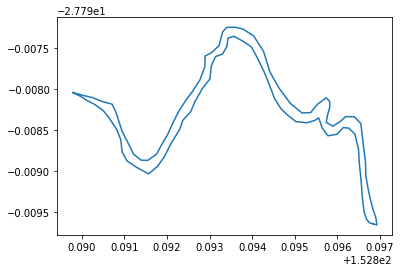

In [28]:
plot(*shape.boundary.xy)